# Computational Structural Design II - Geometry, Data and Visualization

### Learning Goal: 
- Mesh Datastructure

### Content:
- [A. Mesh Introduction](#MeshIntro)
- [B. Mesh Vertex, Edge, Face](#MeshB)
- [C. Mesh Normals](#MeshC)
---


<a id='MeshIntro'></a>
# A. Mesh
## A1. Mesh in Form Finding
Form finding a cable-net or generating a compression-only vault usually starts with a **2D mesh**, which represents the horizontal projection of the eventual structure. The line segments of this mesh is called **Pattern**. The following picture shows you an existing structure and its corresponding pattern. The form-found **Thrust** is also a mesh, but in 3D space. 

![img](https://files.gitbook.com/v0/b/gitbook-legacy-files/o/assets%2F-M730QpQnbAMvz44bqhc%2F-MOff3g181Ib3KNlmKgc%2F-MOfhAWYJRaSfNZucLzL%2Fimage.png?alt=media&token=839252d4-a77e-42cb-81cf-4b6071a5c598)
<center>Nave Vault of the Sherborne Abbey, Dorset, UK (photo by Lawrence Lew)</center>
</br>



## A2. From Polygon to Polygon Mesh - Geometry and Topology
Firstly, let's create create 4 polygons in red, blue, yellow and green. 

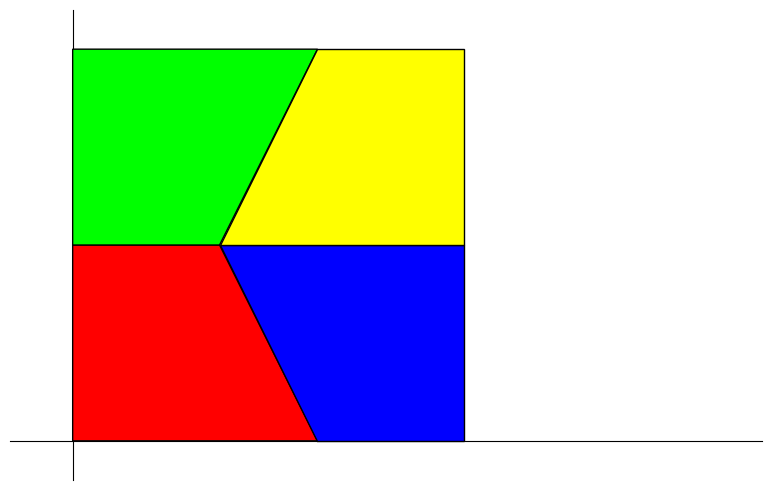

In [11]:
from compas.geometry import Polygon
from compas_plotters import Plotter

polygon_1 = Polygon([[0, 0, 0], [2.5, 0, 0], [1.5, 2, 0], [0, 2, 0]])
polygon_2 = Polygon([[2.5, 0, 0], [4, 0, 0], [4, 2, 0], [1.5, 2, 0]])
polygon_3 = Polygon([[0, 2, 0], [1.5, 2, 0], [2.5, 4, 0], [0, 4, 0]])
polygon_4 = Polygon([[1.5, 2, 0], [4, 2, 0], [4, 4, 0], [2.5, 4, 0]])

# visualize the Point
plotter = Plotter(show_axes=True)
plotter.add(polygon_1, facecolor=(1, 0, 0))
plotter.add(polygon_2, facecolor=(0, 0, 1))
plotter.add(polygon_3, facecolor=(0, 1, 0))
plotter.add(polygon_4, facecolor=(1, 1, 0))
plotter.zoom_extents()
plotter.show()

A mesh can not only conserve geometric information but also topological information. 

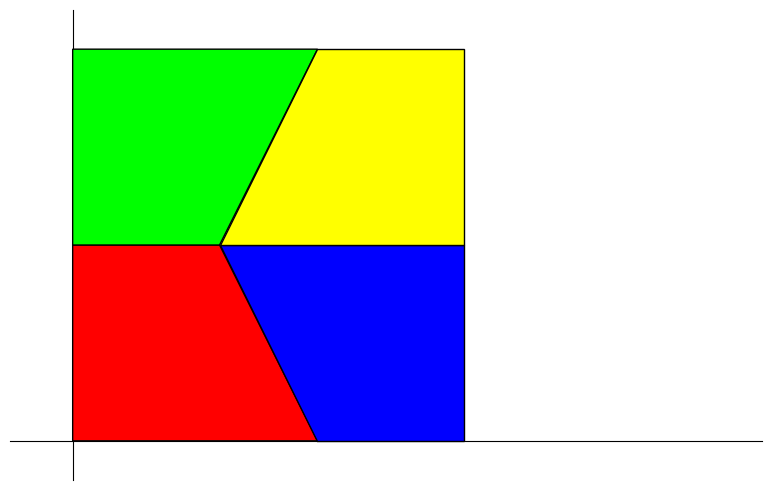

In [12]:
from compas.geometry import Polygon
from compas_plotters import Plotter

points = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]
polygon_1 = Polygon([points[0], points[1], points[4], points[3]])
polygon_2 = Polygon([points[1], points[2], points[5], points[4]])
polygon_3 = Polygon([points[3], points[4], points[7], points[6]])
polygon_4 = Polygon([points[4], points[5], points[8], points[7]])

# visualize the Point
plotter = Plotter(show_axes=True)
plotter.add(polygon_1, facecolor=(1, 0, 0))
plotter.add(polygon_2, facecolor=(0, 0, 1))
plotter.add(polygon_3, facecolor=(0, 1, 0))
plotter.add(polygon_4, facecolor=(1, 1, 0))
plotter.zoom_extents()
plotter.show()

## A3. COMPAS Mesh

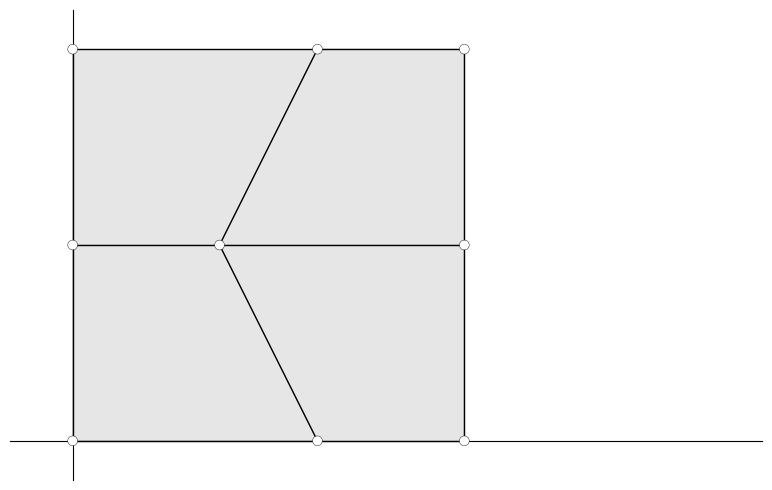

In [8]:
from compas.datastructures import Mesh
from compas.geometry import Polygon
from compas_plotters import Plotter

polygon_1 = Polygon([[0, 0, 0], [2.5, 0, 0], [1.5, 2, 0], [0, 2, 0]])
polygon_2 = Polygon([[2.5, 0, 0], [4, 0, 0], [4, 2, 0], [1.5, 2, 0]])
polygon_3 = Polygon([[0, 2, 0], [1.5, 2, 0], [2.5, 4, 0], [0, 4, 0]])
polygon_4 = Polygon([[1.5, 2, 0], [4, 2, 0], [4, 4, 0], [2.5, 4, 0]])

polygons = [polygon_1, polygon_2, polygon_3, polygon_4]

mesh = Mesh.from_polygons(polygons)

# visualize the Point
plotter = Plotter(show_axes=True)
plotter.add(mesh, sizepolicy='absolute')
plotter.zoom_extents()
plotter.show()

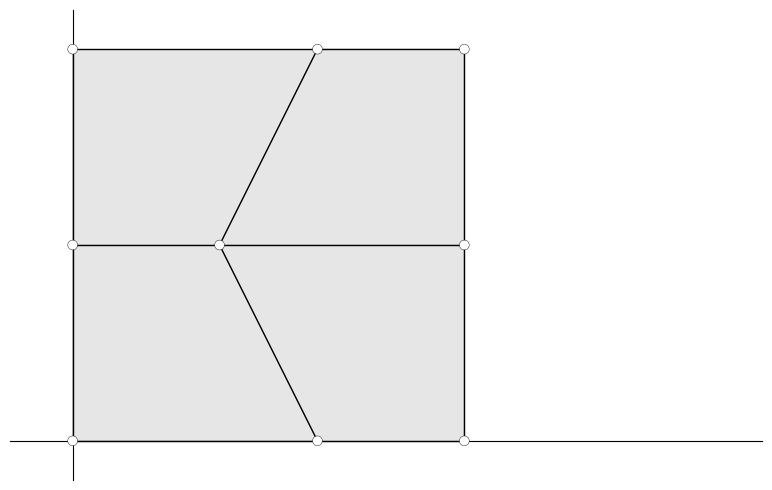

In [9]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

plotter = Plotter(show_axes=True)
plotter.add(mesh, sizepolicy='absolute')
plotter.zoom_extents()
plotter.show()


## A4. Visualize Mesh in 3D Viewer
Now use the 3D viewer to visualize the mesh. 

In [16]:
from compas.datastructures import Mesh
from compas_view2.app import App

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

viewer = App()
viewer.add(mesh)
viewer.run()

Move the middle point up 1 unit along the z axis.

In [2]:
from compas.datastructures import Mesh
from compas_view2.app import App

# modify the z before constructing the mesh
vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 1], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

viewer = App()
viewer.add(mesh)
viewer.run()

In [3]:
from compas.datastructures import Mesh
from compas_view2.app import App

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)
# modify z after constructing the mesh
mesh.vertex_attribute(4, "z", 1)

viewer = App()
viewer.add(mesh)
viewer.run()

---
# B. Mesh Vertex, Edge, Face

Mesh has three main components: vertex, edge, face. 

A vertex is a point in 3D space, represented by the [x, y, z] coordinate. 

PICTURE TO BE INSERTED

An edge connects two vertices together. 

PICTURE TO BE INSERTED

A face is constructed by connecting the edges together. A 3D geometry can be constructed by connecting faces together. 

PICTURE TO BE INSERTED

Mesh talks about how the points are connected. It's about connectivity instead of the geometry. 

To access the vertices, faces, and edges of the mesh data structure, use the corresponding methods. Note that these methods return generator objects that have to be consumed by iteration.

In [12]:
# generator objects
print(mesh.vertices())
print(mesh.faces())
print(mesh.edges())

<generator object HalfEdge.vertices at 0x18c63e660>
<generator object HalfEdge.faces at 0x18c63e660>
<generator object HalfEdge.edges at 0x18c63e660>


In [19]:
print("Vertices")
for vertex in mesh.vertices():
     print(vertex, end=" ")

print("Faces")
for face in mesh.faces():
     print(face, end=" ")

print("Edges")
for edge in mesh.edges():
     print(edge, end=" ")
        
# for (u, v) in mesh.edges():
#     print((u, v), end=" ")

Vertices
0 1 2 3 4 5 6 7 8 Faces
0 1 2 3 Edges
(0, 1) (0, 3) (1, 4) (1, 2) (2, 5) (3, 4) (3, 6) (4, 5) (4, 7) (5, 8) (6, 7) (7, 8) (0, 1) (0, 3) (1, 4) (1, 2) (2, 5) (3, 4) (3, 6) (4, 5) (4, 7) (5, 8) (6, 7) (7, 8) 

In [20]:
vertices = list(mesh.vertices())
print(vertices)

edges = list(mesh.edges())
print(edges)

faces = list(mesh.faces())
print(faces)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[(0, 1), (0, 3), (1, 4), (1, 2), (2, 5), (3, 4), (3, 6), (4, 5), (4, 7), (5, 8), (6, 7), (7, 8)]
[0, 1, 2, 3]


## B1. Visualize the Points

In [16]:
from compas.datastructures import Mesh
from compas.geometry import Sphere, Point
from compas_view2.app import App
from compas_view2.shapes import Text
# from compas_notebook.app import App

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 1], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

viewer = App()

for vkey in mesh.vertices():
    xyz = mesh.vertex_coordinates(vkey)
#     viewer.add(Sphere(xyz, 0.05), color=(0.7, 0., 0.7))
    viewer.add(Point(*xyz), color=(0.7, 0., 0.7))

# # only visualize Vertex 4
# vkey = 4
# xyz = mesh.vertex_coordinates(vkey)
# viewer.add(Point(*xyz), color=(0.7, 0., 0.7))

viewer.add(mesh)
viewer.run()

## B2. Visualize the Lines


In [4]:
from compas.datastructures import Mesh
from compas.geometry import Line
from compas_view2.app import App
# from compas_notebook.app import App

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 1], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

viewer = App()

for edge in mesh.edges():
    a, b = mesh.edge_coordinates(*edge)
    line = Line(a, b)
    viewer.add(line, linewidth=10, linecolor=(0, 1, 0))

viewer.add(mesh)
viewer.show()

## B3. Visualize the Faces

In [22]:
from compas.datastructures import Mesh
from compas.geometry import Polygon
from compas_view2.app import App
# from compas_notebook.app import App

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 1], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

viewer = App()

for fkey in mesh.faces():
    points = mesh.face_coordinates(fkey)
    polygon = Polygon(points)
    viewer.add(polygon, facecolor=(0, 0, 0.7))

viewer.add(mesh)
viewer.show()

# C. Mesh Normals

## C1. Face Normals
The ordering of the vertices determines the direction of the face normal.

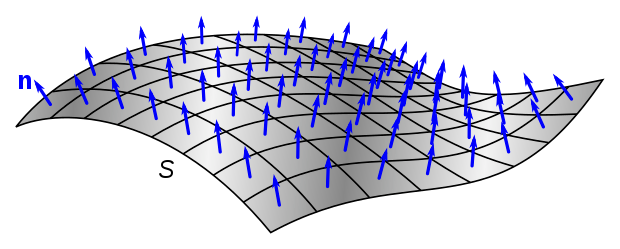

In [27]:
from compas.datastructures import Mesh
from compas.geometry import Polygon, add_vectors, scale_vector
from compas_view2.app import App
# from compas_notebook.app import App

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 1], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

viewer = App()

scale_factor = 0.5 
for fkey in mesh.faces():
    f_normal = mesh.face_normal(fkey)
    f_centorid = mesh.face_centroid(fkey)
    line = Line(f_centorid, add_vectors(f_centorid, scale_vector(f_normal, scale_factor)))
    viewer.add(line, linecolor=(1, 0, 0))

viewer.add(mesh)
viewer.show()

## C2. Vertex Normals
Vertex Normals are the weighted average of the normals of the neighboring faces.

In [29]:
from compas.datastructures import Mesh
from compas.geometry import Polygon, add_vectors, scale_vector
from compas_view2.app import App
# from compas_notebook.app import App

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 1], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

viewer = App()

scale_factor = 0.5 
for vkey in mesh.vertices():
    v_normal = mesh.vertex_normal(vkey)
    xyz = mesh.vertex_coordinates(vkey)
    line = Line(xyz, add_vectors(xyz, scale_vector(v_normal, scale_factor)))
    viewer.add(line, linecolor=(1, 0, 0))

viewer.add(mesh)
viewer.show()

---

# D. Exercise: Geodesic Dome
## D1. Load Mesh

In [18]:
from compas.datastructures import Mesh
from compas.geometry import Polygon, add_vectors, scale_vector
from compas_view2.app import App
# from compas_notebook.app import App

mesh = Mesh.from_json("data/geodome.json")

viewer = App()
viewer.add(mesh)
viewer.show()

## D2. Draw Joints

In [25]:
from compas.geometry import Sphere

viewer = App()

for vkey in mesh.vertices():
    viewer.add(Sphere(mesh.vertex_coordinates(vkey), 0.1), color=(1, 0, 0))

# viewer.add(mesh)
viewer.run()

In [24]:
from compas.geometry import Cylinder, Plane, Circle

viewer = App()

for vkey in mesh.vertices():
    xyz = mesh.vertex_coordinates(vkey)
    normal = mesh.vertex_normal(vkey)
    
    plane = Plane(xyz, normal) # center, normal
    circle = Circle(plane, 0.1)
    
    cylinder = Cylinder(circle, 0.1)
    viewer.add(cylinder, color=(1, 0, 0))

# viewer.add(mesh)
viewer.run()

## D3. Draw Bars

In [28]:
from compas.geometry import Plane, Vector, Circle, Cylinder
from compas_view2.app import App

viewer = App()
# viewer.add(mesh)

for vkey in mesh.vertices():
    xyz = mesh.vertex_coordinates(vkey)
    normal = mesh.vertex_normal(vkey)
    
    plane = Plane(xyz, normal) # center, normal
    circle = Circle(plane, 0.1)
    
    cylinder = Cylinder(circle, 0.1)
    viewer.add(cylinder, color=(1, 0, 0))
    
    
for (u, v) in mesh.edges():
    u_xyz = mesh.vertex_coordinates(u)
    v_xyz = mesh.vertex_coordinates(v)

# pipe:   circle ([plane, radius] | Circle) – The circle of the cylinder.
#         height (float) – The height of the cylinder.
    center = [0.5 * (a + b) for a, b in zip(u_xyz, v_xyz)]
    normal = Vector.from_start_end(v_xyz, u_xyz)
    plane = Plane(center, normal) # center, normal
    circle = Circle(plane, 0.03)
    
    cylinder = Cylinder(circle, normal.length - 0.1)
    viewer.add(cylinder)

viewer.run()

## D4. Draw Facades

In [37]:
from compas.geometry import Polygon, Translation, scale_vector
from compas_view2.app import App

viewer = App()

for vkey in mesh.vertices():
    xyz = mesh.vertex_coordinates(vkey)
    normal = mesh.vertex_normal(vkey)
    
    plane = Plane(xyz, normal) # center, normal
    circle = Circle(plane, 0.1)
    
    cylinder = Cylinder(circle, 0.1)
    viewer.add(cylinder, color=(1, 0, 0))
    
    
for (u, v) in mesh.edges():
    u_xyz = mesh.vertex_coordinates(u)
    v_xyz = mesh.vertex_coordinates(v)

# pipe:   circle ([plane, radius] | Circle) – The circle of the cylinder.
#         height (float) – The height of the cylinder.
    center = [0.5 * (a + b) for a, b in zip(u_xyz, v_xyz)]
    normal = Vector.from_start_end(v_xyz, u_xyz)
    plane = Plane(center, normal) # center, normal
    circle = Circle(plane, 0.03)
    
    cylinder = Cylinder(circle, normal.length - 0.1)
    viewer.add(cylinder)
    
dis = 0.05
for fkey in mesh.faces():
    points = mesh.face_coordinates(fkey)
    polygon = Polygon(points)
    
    f_normal = mesh.face_normal(fkey)
    T = Translation.from_vector(scale_vector(f_normal, dis))
    polygon.transform(T)
    
    viewer.add(polygon, facecolor=(0, 0, 0.7))
        
viewer.run()

In [ ]:
from compas.geometry import Polygon, Translation, scale_vector, Scale
from compas_view2.app import App

viewer = App()

for vkey in mesh.vertices():
    xyz = mesh.vertex_coordinates(vkey)
    normal = mesh.vertex_normal(vkey)
    
    plane = Plane(xyz, normal) # center, normal
    circle = Circle(plane, 0.1)
    
    cylinder = Cylinder(circle, 0.1)
    viewer.add(cylinder, color=(1, 0, 0))
    
    
for (u, v) in mesh.edges():
    u_xyz = mesh.vertex_coordinates(u)
    v_xyz = mesh.vertex_coordinates(v)

# pipe:   circle ([plane, radius] | Circle) – The circle of the cylinder.
#         height (float) – The height of the cylinder.
    center = [0.5 * (a + b) for a, b in zip(u_xyz, v_xyz)]
    normal = Vector.from_start_end(v_xyz, u_xyz)
    plane = Plane(center, normal) # center, normal
    circle = Circle(plane, 0.03)
    
    cylinder = Cylinder(circle, normal.length - 0.1)
    viewer.add(cylinder)
    
dis = 0.05
for fkey in mesh.faces():
    points = mesh.face_coordinates(fkey)
    polygon = Polygon(points)
    
    f_normal = mesh.face_normal(fkey)
    T = Translation.from_vector(scale_vector(f_normal, dis))
    polygon.transform(T)
    
    f_centroid = mesh.face_centroid(fkey)
    plane = Plane(center, normal)
    
    viewer.add(polygon, facecolor=(0, 0, 0.7))
        
viewer.run()

## A2. COMPAS Mesh
A thrust object we created in RV2 is also a mesh. Let's try to find the vertices, edges, faces on a mesh. 

In [3]:
import os
from compas.datastructures import Mesh

HERE = os.getcwd()
DATA = os.path.abspath(os.path.join(HERE, 'data'))
FILE_I = os.path.join(DATA, 'simple_dome.json')

thrust = Mesh.from_json(FILE_I)


In [5]:
from compas_view2.app import App
viewer = App()
viewer.add(thrust)
viewer.run()


In [6]:
mesh = Mesh.from_json(FILE_I)
vertices = list(mesh.vertices())
edges = list(mesh.edges())
faces = list(mesh.faces())
# print(vertices, edges, faces)

## Add Vertices

In [14]:
from compas.geometry import Sphere
viewer = App()
viewer.add(mesh)
for vkey in mesh.vertices():
    viewer.add(Sphere(mesh.vertex_coordinates(vkey), 0.05), color=(1, 0, 0))

viewer.run()

## Add Edges

In [13]:
from compas.geometry import Plane, Vector, Circle, Cylinder
from compas_view2.app import App

viewer = App()
# viewer.add(mesh)
for (u, v) in mesh.edges():
    u_xyz = mesh.vertex_coordinates(u)
    v_xyz = mesh.vertex_coordinates(v)

# pipe:   circle ([plane, radius] | Circle) – The circle of the cylinder.
#         height (float) – The height of the cylinder.
    center = [0.5 * (a + b) for a, b in zip(u_xyz, v_xyz)]
    normal = Vector.from_start_end(v_xyz, u_xyz)
    plane = Plane(center, normal) # center, normal
    circle = Circle(plane, 0.05)
    
    cylinder = Cylinder(circle, normal.length - 0.1)
    viewer.add(cylinder)
    


viewer.run()

## Add Faces

In [85]:
from compas.geometry import Polygon, offset_polygon, normal_polygon, offset_line, intersection_line_line, centroid_points
from compas_view2.app import App
from compas.utilities import is_item_iterable, iterable_like, pairwise

viewer = App()

distance = 0.1 
tol = 1e-3

def intersect_lines(l1, l2, tol):
    x1, x2 = intersection_line_line(l1, l2, tol)
    if x1 and x2:
        return centroid_points([x1, x2])
    
def offset_segments(point_list, distances, normal):
    segments = []
    for line, distance in zip(pairwise(point_list), distances):
        segments.append(offset_line(line, distance, normal))
    return segments

def intersect(l1, l2, tol):
    supported_funcs = [intersect_lines, intersect_lines_colinear]
    for func in supported_funcs:
        point = func(l1, l2, tol)
        if point:
            return point
    msg = "Intersection not found for line: {}, and line: {}".format(l1, l2)
    raise ValueError(msg)

def intersect_lines_colinear(l1, l2, tol):
    def are_segments_colinear(l1, l2, tol):
        a, b = l1
        d, c = l2
        return is_colinear(a, b, c, tol)
    if are_segments_colinear(l1, l2, tol):
        return centroid_points([l1[1], l2[0]])
    
for fkey in mesh.faces():
    vkeys = mesh.face_vertices(fkey)
    v_xyzs = [mesh.vertex_coordinates(vkey) for vkey in vkeys]
    polygon = Polygon(v_xyzs)
    
    normal = normal_polygon(polygon)

    if not is_item_iterable(distance):
        distance = [distance]
    distances = iterable_like(polygon, distance, distance[-1])

    polygon = polygon.points + polygon[:1]
    segments = offset_segments(polygon, distances, normal)

    offset = []
    for s1, s2 in pairwise(segments[-1:] + segments):
        point = intersect(s1, s2, tol)
        offset.append(point)
    
#     offset_polygon = offset_polygon(v_xyzs, -0.1, 0.5)
#     print(offset_polygon)
    viewer.add(Polygon(offset))
        
viewer.run()

In [88]:
from compas.geometry import Polygon, offset_polygon, normal_polygon, offset_line, intersection_line_line, centroid_points
from compas_view2.app import App
from compas.utilities import is_item_iterable, iterable_like, pairwise

viewer = App()

distance = 0.1 
tol = 1e-3

def intersect_lines(l1, l2, tol):
    x1, x2 = intersection_line_line(l1, l2, tol)
    if x1 and x2:
        return centroid_points([x1, x2])
    
def offset_segments(point_list, distances, normal):
    segments = []
    for line, distance in zip(pairwise(point_list), distances):
        segments.append(offset_line(line, distance, normal))
    return segments

def intersect(l1, l2, tol):
    supported_funcs = [intersect_lines, intersect_lines_colinear]
    for func in supported_funcs:
        point = func(l1, l2, tol)
        if point:
            return point
    msg = "Intersection not found for line: {}, and line: {}".format(l1, l2)
    raise ValueError(msg)

def intersect_lines_colinear(l1, l2, tol):
    def are_segments_colinear(l1, l2, tol):
        a, b = l1
        d, c = l2
        return is_colinear(a, b, c, tol)
    if are_segments_colinear(l1, l2, tol):
        return centroid_points([l1[1], l2[0]])
    
for fkey in mesh.faces():
    vkeys = mesh.face_vertices(fkey)
    v_xyzs = [mesh.vertex_coordinates(vkey) for vkey in vkeys]
    polygon = Polygon(v_xyzs)
    
#     normal = normal_polygon(polygon)

#     if not is_item_iterable(distance):
#         distance = [distance]
#     distances = iterable_like(polygon, distance, distance[-1])

#     polygon = polygon.points + polygon[:1]
#     segments = offset_segments(polygon, distances, normal)

#     offset = []
#     for s1, s2 in pairwise(segments[-1:] + segments):
#         point = intersect(s1, s2, tol)
#         offset.append(point)
    
    offset_polygon = offset_polygon(v_xyzs, -0.1, tol)
    print(offset_polygon)
    viewer.add(Polygon(offset))
        
viewer.run()

[[-0.45773186718607506, 10.157731867186074, -0.06245222870480714], [-0.25376065592553043, 8.94893620131229, 0.23361034012814977], [0.883250474867052, 8.816749525132948, 1.0179290079921222], [0.7510637986877111, 9.95376065592553, 0.23361034012814996]]


TypeError: 'list' object is not callable

In [5]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

class GeodesicDome:
    """
    Geodesic Dome of Nv vertices and Nf faces.

    self.v: (Nv, 3) array. list of vertices.
    self.f: (Nf, 3) array. list of vertex indices to define faces.
    """
    def __init__(self):
        ## vertices ##
        p = (1 + np.sqrt(5)) / 2
        a = np.sqrt((3 + 4 * p) / 5) / 2
        b = np.sqrt(p / np.sqrt(5))
        c = np.sqrt(3 / 4 - a ** 2)
        d = np.sqrt(3 / 4 - (b - a)** 2)
        # icosahedron in (r, theta, z) == cylindrical coordinates
        self.v = np.array([
            [0, 0, (c + d / 2)],
            [b, 2*0*np.pi / 5, d / 2],
            [b, 2*1*np.pi / 5, d / 2],
            [b, 2*2*np.pi / 5, d / 2],
            [b, 2*3*np.pi / 5, d / 2],
            [b, 2*4*np.pi / 5, d / 2],
            [b, (2*0+1)*np.pi / 5, - d / 2],
            [b, (2*1+1)*np.pi / 5, - d / 2],
            [b, (2*2+1)*np.pi / 5, - d / 2],
            [b, (2*3+1)*np.pi / 5, - d / 2],
            [b, (2*4+1)*np.pi / 5, - d / 2],
            [0, 0, -(c + d / 2)],
        ])
        # icosahedron in (x, y, z) == Cartesian coordinates
        self.v = np.vstack([
            self.v[:, 0]*np.cos(self.v[:, 1]),
            self.v[:, 0]*np.sin(self.v[:, 1]),
            self.v[:, 2]
        ]).T
        # normalize the radius
        self.v *= (1 / self.v[0, 2])

        # fix super small values to zero
        self.tol = 1e-15
        self.v[np.abs(self.v) < self.tol] = 0

        ## faces ##
        self.f = np.array([
            [2, 0, 1],
            [3, 0, 2],
            [4, 0, 3],
            [5, 0, 4],
            [1, 0, 5],
            [2, 1, 6],
            [7, 2, 6],
            [3, 2, 7],
            [8, 3, 7],
            [4, 3, 8],
            [9, 4, 8],
            [5, 4, 9],
            [10, 5, 9],
            [6, 1, 10],
            [1, 5, 10],
            [6, 11, 7],
            [7, 11, 8],
            [8, 11, 9],
            [9, 11, 10],
            [10, 11, 6],
        ])

    def plot3D(self):
        fig = plt.figure()
        ax = Axes3D(fig)
        tri = Poly3DCollection(self.v[self.f].reshape((-1, 3)))
        tri.set_edgecolor('k')
        ax.add_collection3d(tri)
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_zlim(-2, 2)
        plt.show()

    def tessellate(self, iter=1):
        def newvert(v0, v1):
            v = v0 + v1
            v /= np.linalg.norm(v)
            return v

        for _ in range(iter):
            f = self.f
            v = self.v
            v2 = []
            vv2v = {}
            vid = len(v)
            for tri in self.f:
                for i, j in zip([0, 1, 2], [1, 2, 0]):
                    if tri[i] < tri[j]:
                        vv2v[tri[i], tri[j]] = vv2v[tri[j], tri[i]] = vid
                        vid += 1
                        v2.append(newvert(v[tri[i]], v[tri[j]]))
            v = np.vstack([v, np.array(v2)])

            f2 = []
            for tri in self.f:
                f2.append([tri[0], vv2v[tri[0], tri[1]], vv2v[tri[2], tri[0]]])
                f2.append([tri[1], vv2v[tri[1], tri[2]], vv2v[tri[0], tri[1]]])
                f2.append([tri[2], vv2v[tri[2], tri[0]], vv2v[tri[1], tri[2]]])
                f2.append([vv2v[tri[0], tri[1]], vv2v[tri[1], tri[2]], vv2v[tri[2], tri[0]]])

            self.v = v
            self.f = np.array(f2)

        self.v[np.abs(self.v) < self.tol] = 0
        return self

    def face_normal(self):
        """
        This function is not needed in most cases, since the vertex position is identical to its normal.
        """
        tri = self.v[self.f]
        n = np.cross(tri[:, 1,:] - tri[:, 0,:], tri[:, 2,:] - tri[:, 0,:])
        n /= np.linalg.norm(n, axis=0)
        return n

    def save_as_ply(self, filename):
        with open(filename, 'w') as fp:
            fp.write('ply\n')
            fp.write('format ascii 1.0\n')
            fp.write(f'element vertex {len(self.v)}\n')
            fp.write('property float x\n')
            fp.write('property float y\n')
            fp.write('property float z\n')
            fp.write(f'element face {len(self.f)}\n')
            fp.write('property list uchar int vertex_indices\n')
            fp.write('end_header\n')
            np.savetxt(fp, self.v)
            f2 = np.hstack([(np.ones(len(self.f), dtype=np.int32) * 3).reshape((-1, 1)), self.f])
            np.savetxt(fp, f2, fmt='%d')

# Icosahedron
g = GeodesicDome()

# Subdivide N times
g.tessellate(3)

# Check the number of vertices / faces
print(f'num of vertices = {len(g.v)}, num of faces = {len(g.f)}')

# Save as PLY
g.save_as_ply('a.ply')



num of vertices = 642, num of faces = 1280
